In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
class Perceptron:
    def __init__(self, learning_rate=0.1, interval_weights=(-0.5, 0.5)):
        self.interval_weights = interval_weights
        self.weights = np.random.uniform(interval_weights[0], interval_weights[1], 3)  # Adiciona +1 para o termo de polarização
        self.weights_initial = self.weights
        self.learning_rate = learning_rate

    def predict(self, x):
        activation = np.dot(self.weights[1:], x) + self.weights[0]  # Adiciona o termo de polarização
        return 1 if activation >= 0 else 0

    def train(self, X, y):
        epochs = 0
        total_adjustments = 0
        errors = True

        while errors:
            errors = False
            epoch_adjustments = 0

            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                if error != 0:
                    self.weights[1:] += self.learning_rate * error * X[i]
                    self.weights[0] += self.learning_rate * error  # Atualiza o termo de polarização
                    epoch_adjustments += 1
                    errors = True

            epochs += 1
            total_adjustments += epoch_adjustments

        return total_adjustments, epochs


In [96]:
# Carregar os dados binários do arquivo
def load_data(filename):
    with open(filename, 'rb') as file:
        data = np.fromfile(file, dtype=np.float64)
        # Reshape data into (m, 3) where m is the number of examples
        data = data.reshape(-1, 3)
    return data

# Converter os rótulos para inteiros
def convert_labels(labels):
    return labels.astype(int)        

In [97]:
# Carregando dados
data = load_data('datasets/data0.txt')
X = data[:, :-1]  # Features
y = convert_labels(data[:, -1])  # Labels

In [98]:
# Treinamento e coleta de dados
set_learning_rate = [0.4,0.1,0.01]
set_interval = [(-100,100), (-0.5, 0.5)]
learning_rate, interval, total_adjustments, weights, weights_initial, epochs = [],[],[],[],[],[]
last_weight = []
for i in range(len(set_learning_rate)):
    for j in range(len(set_interval)):
        for t in range(10):
            aux_learning_rate = set_learning_rate[i]
            aux_interval_weights = set_interval[j]
            perceptron = Perceptron(learning_rate= aux_learning_rate,interval_weights=aux_interval_weights)
            aux_total_adjustments, aux_epochs = perceptron.train(X, y)
            
            learning_rate.append(aux_learning_rate)
            interval.append(aux_interval_weights)
            total_adjustments.append(aux_total_adjustments)
            weights.append(perceptron.weights)
            weights_initial.append(perceptron.weights_initial)
            epochs.append(aux_epochs)
        last_weight.append(perceptron.weights)

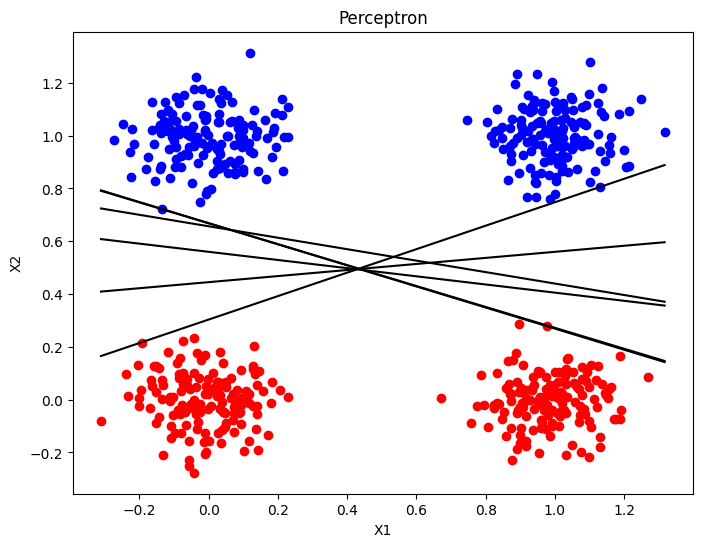

In [99]:
#Plot gráfico
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', marker='o')
    else:
        plt.scatter(X[i][0], X[i][1], color='blue', marker='o')
for x in range(len(last_weight)):
    weights = last_weight[x]
    slope = -weights[1] / weights[2]  
    intercept = -weights[0] / weights[2]
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)  # Usar a primeira característica para os limites
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color='black')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron')
plt.show()

In [100]:
# Tabela das configurações
df =  pd.DataFrame({
    'Taxa de Aprendizado':learning_rate,
    'Intervalo de pesos':interval,
    'Quantidade de Ajustes':total_adjustments,
    'Épocas':epochs
})

In [105]:
# Formatando saída das configurações
adjustMean = df.groupby(['Taxa de Aprendizado', 'Intervalo de pesos']).mean()['Quantidade de Ajustes'].values #Pegar média do ajuste
adjustStd = df.groupby(['Taxa de Aprendizado', 'Intervalo de pesos']).std()['Quantidade de Ajustes'].values #Pegar o desvio padrão do ajuste
epochsMin = df.groupby(['Taxa de Aprendizado', 'Intervalo de pesos']).min()['Épocas'].values #Pegar a menor época para convergência

adjust=[]

for i in range(len(adjustMean)):
    msg = f'{adjustMean[i]:.2f} \u00B1 {adjustStd[i]:.2f}'
    adjust.append(msg)

dfSettings = pd.DataFrame({
    'Taxa de Aprendizado':[0.01,0.01, 0.10,0.10, 0.40, 0.40],
    'Intervalo de pesos':[(-100,100),(-0.5, 0.5), (-100,100),(-0.5, 0.5), (-100,100),(-0.5, 0.5)],
    'Quantidade de Ajustes':adjust,
    'Menor número de épocas para convergência':epochsMin
})


In [107]:
# Imprimindo configurações
dfSettings.head(6)

,Taxa de Aprendizado,Intervalo de pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0,0.01,"(-100, 100)",13409.90 ± 8641.51,69
1,0.01,"(-0.5, 0.5)",70.60 ± 29.17,3
2,0.10,"(-100, 100)",1183.60 ± 436.27,12
3,0.10,"(-0.5, 0.5)",7.60 ± 3.53,1
4,0.40,"(-100, 100)",276.50 ± 136.02,5
5,0.40,"(-0.5, 0.5)",6.50 ± 3.78,2


## Considerações finais
De acordo com o dados finais após o aprendizado do Perceptron, pode-se perceber que a configuração que possui a Taxa de Aprendizado 0.4 e o menor Intervalo de Pesos (-0.5, +0.5) obteve a menor quantidade de ajustes, além disso, comparada às 10 repetições que cada configuração teve, ela também convergiu muito antes que as outras, podendo ser uma configuração melhor que as demais. Apesar disso, essa afirmação leva uma atenção especial que podemos notar é que o intervalo de pesos mais estreito, (-0.5, +0.5), trouxe menores épocas para convergência, mas para cada caso houveram diferenças na quantidade de ajustes, dessa forma é possível notar que a configuração de Taxa de aprendizado 0.1, Intervalo de pesos (-0.5,+0.5) é similar à configuração com a Taxa de Aprendizado 0.4 com o mesmo intervalo de pesos. Podemos também perceber que o intervalo de pesos (-100, +100) trouxe maiores quantidades de ajustes. Portanto, podemos perceber que nas configurações dadas para esse Perceptron, àquelas com menor intervalo de pesos tiveram quantidades de ajustes menores que 100 podendo ser configurações promissoras para serem boas, mas diante de todos os dados, a melhor configuração foi a Taxa de Aprendizado 0.4 e Intervalo de pesos (-0.5,+0.5).